# 18460 Project

In [1]:
%load_ext autoreload
%autoreload 2

from tasks import *
import numpy as np
from server import Server
import time

First, we initialize the task for a given configuration

In [2]:
#task = lrt.LinearRegressionTask(lrt.solo_config) # Linear regression
#task = ct.CircleTask(ct.solo_config) # Circle
task = lgrt.LogisticRegressionTask() # Logistic regression with mushrooms

Intializing task LogisticRegressionTask with config Config(clients=[<Computation.HIGH: 1>, <Computation.LOW: 2>], lr=0.001, nlr=0.004)


Seeing the data

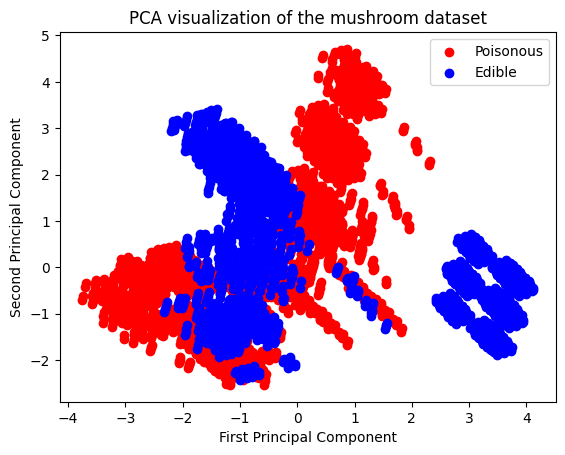

In [3]:
task.visualize()

Solve iteratively using federated learning

In [4]:
# Create server and initialize clients, before iteratively updating the consensus variables
server = Server(task)
server.connect_clients() # create clients with problem description including a partition of the dataset

start_time = time.perf_counter()
problem = task.get_problem()

k = 0
last_cost = float('infinity')
while k < problem.max_iter and server.delta > problem.tol:
    consensus = server.consensus.flatten()
    
    current_cost = problem.loss(consensus, task.dataset, problem.hyper_parameters)
    
    if k % 500 == 0:
        print(f'''
        Iteration {k}: {consensus}
        Cost: {current_cost}

        ''')
    
    # perform new iteration
    server.run_iteration(k+1)
    
    if np.linalg.norm(current_cost - last_cost) < problem.ctol:
        print(f"Condition reached: change in cost is {np.linalg.norm(current_cost - last_cost)} "
              f"which is smaller than {problem.ctol}")
        last_cost = current_cost
        break
        
    last_cost = current_cost
    
    k = k + 1
    
solution = server.consensus.flatten()
end_time = time.perf_counter()
if k >= problem.max_iter and server.delta > problem.tol:
    raise Exception("Did not converge")
    
if server.delta <= problem.tol:
    print(f"Condition reached: change in solution is {server.delta} "
          f"which is smaller than {problem.tol}")

print("")
print(f"Solution: {solution}")
print(f"Associated cost: {last_cost}")
print(f"Achieved in {k} iterations")
print(f"Elasped time: {end_time - start_time}")


        Iteration 0: [-0.13453045 -1.56560908  0.35110942  0.2673986  -0.67376445 -0.67475168
 -0.54837497 -0.15404595  0.04412342  0.48934206 -0.32408344 -1.41620204
  1.96696922 -1.48757233 -1.58534884 -1.17003857  0.63024282 -0.03417205
  0.03602425 -1.70929172  0.55568946  2.44818164 -1.23127796]
        Cost: 15949.502578361065

        

        Iteration 500: [ 0.00322165 -0.39863224  0.14109204  0.23726211 -0.54781005 -0.4256377
 -0.68340525  1.7268744  -0.21030067 -0.76756025 -1.1603759  -1.50893209
  0.9667055  -0.85810653 -0.83201555 -1.17003857  0.66013622 -0.22413723
 -0.57473804 -1.93766435  0.30062706  1.06799784 -0.84966354]
        Cost: 4097.4864222487795

        

        Iteration 1000: [-0.06801944 -0.19865218  0.26918152 -0.16159581 -0.67898415 -0.50400096
 -1.13259771  2.05679533 -0.44990009 -0.22109669 -0.94398885 -1.73591262
  0.44826399 -0.90946146 -0.77197599 -1.17003857  0.81453597 -0.04454599
  0.3198237  -1.51199462  0.11797171  1.09454104 -0.68265179]
 


        Iteration 11500: [-0.03320457  0.62320566 -0.14636252 -0.64311911 -1.54673186 -1.59904543
 -3.34323787  4.31809836 -0.44414956  0.76372268 -1.94720048 -3.67574125
 -0.05774029 -0.27964839 -0.09686119 -1.17003857  3.98356634  0.93119937
  2.14978361 -0.81381732 -0.91245657  0.01013944 -0.25340511]
        Cost: 1328.6610624248685

        

        Iteration 12000: [-0.03156239  0.62039829 -0.14750732 -0.60886812 -1.54254405 -1.64419104
 -3.350309    4.33817668 -0.45329656  0.73795389 -1.97803235 -3.71692214
 -0.06894651 -0.28562467 -0.09699755 -1.17003857  4.03777163  0.92299787
  2.18489709 -0.79193317 -0.90944418  0.00938984 -0.2755488 ]
        Cost: 1327.1942557806506

        

        Iteration 12500: [-0.03144419  0.61169546 -0.14985715 -0.57715549 -1.53855638 -1.68025246
 -3.35915172  4.35709884 -0.46116834  0.71446337 -2.00712402 -3.75172694
 -0.06539079 -0.28994467 -0.09837602 -1.17003857  4.0826756   0.91526739
  2.21217006 -0.77272155 -0.90692492  0.00796595 -0.299

Exception: Did not converge

## Visualization of the solution

In [ ]:
task.visualize_solution(solution)